In [1]:
# Dependencies and config file
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key, api_key2, api_key3, api_key4, api_key5, api_key6, api_key7
import openweathermapy as owm
from citipy import citipy
from random import randint
import numpy as np

In [2]:
# Randomly select 500 unique latitudes (range adjusted after dropping duplicates)
latitude_list = []

for x in range(2800):
    latitude_list.append(np.random.uniform(low=-180.0, high=180, size=None))

# Convert list to series
latitude_list_series = pd.Series(latitude_list)

In [3]:
# Randomly select 500 unique longitudes (range adjusted after dropping duplicates)
longitude_list = []

for x in range(2800):
    longitude_list.append(np.random.uniform(low=-90, high = 90))
    #print(longitude)

# Convert list to series
longitude_list_series = pd.Series(longitude_list)

In [4]:
# Concatentate the series into a df
lat_and_long = pd.concat([latitude_list_series, longitude_list_series], axis=1)
lat_and_long.head()

,0,1
0,-159.514548,-36.591713
1,33.160221,-67.999292
2,-52.901356,69.619303
3,-48.582434,-5.171995
4,13.579288,-82.312284


In [5]:
# Rename columns
lat_and_long = lat_and_long.rename(columns={0: "Latitude", 1:"Longitude"})
lat_and_long.head()

,Latitude,Longitude
0,-159.514548,-36.591713
1,33.160221,-67.999292
2,-52.901356,69.619303
3,-48.582434,-5.171995
4,13.579288,-82.312284


In [6]:
# Create Blank list for holiding the city name
cities = []

# Iterate through latitudes and longitudes and use info from citipy to create a list of cities
for index, row in lat_and_long.iterrows():
    x = row["Latitude"]
    y = row["Longitude"]
    city = citipy.nearest_city(x,y)
    lat_and_long.set_value(index, "City", city.city_name)
    lat_and_long.set_value(index, "Country Code", city.country_code)
    city_list = city.city_name
    cities.append(city_list)

# Convert list to series
cities = pd.Series(cities)

In [7]:
# Drop duplicate cities from city column
lat_and_long = lat_and_long.drop_duplicates(subset = ["City"], keep = "first")
lat_and_long = lat_and_long.reset_index(drop=True)
lat_and_long.head()

,Latitude,Longitude,City,Country Code
0,-159.514548,-36.591713,ushuaia,ar
1,33.160221,-67.999292,hamilton,bm
2,-52.901356,69.619303,saint-philippe,re
3,-48.582434,-5.171995,cape town,za
4,13.579288,-82.312284,puerto cabezas,ni


In [8]:
# Create empty list for storing city + country code together
city_country_list = []

# Iterate through df to populate the list of cities with their country code (to facilitate weather lookup) 
for index, row in lat_and_long.iterrows():
    x = row["City"]
    y = row["Country Code"]
    city = str(x) + "," + str(y)
    if city not in city_country_list:
        city_country_list.append(city) 

In [9]:
# Create settings dictionary and summary list
settings = {"units": "imperial", "appid": api_key6}
summary = ["name", "sys.country", "coord.lon", "coord.lat", "main.temp", "wind.speed", "clouds.all", "main.humidity"]

# Create a list to hold the dictionaries
meta_weather_summary = []

# Iterate through the city + country code list to get the current weather for each
for x in city_country_list:
    # Print a log of each city as it is being processed, use except statement for incomplete data
    print(f"Retrieving data for city:{x}.")
    try:
        current_weather = owm.get_current(x, **settings)
        weather_summary = current_weather(*summary)
        meta_weather_summary.append(weather_summary) 
    except: 
        print("No data found.")
#print(meta_weather_summary)

Retrieving data for city:ushuaia,ar.
Retrieving data for city:hamilton,bm.
Retrieving data for city:saint-philippe,re.
Retrieving data for city:cape town,za.
Retrieving data for city:puerto cabezas,ni.
Retrieving data for city:gilleleje,dk.
Retrieving data for city:arraial do cabo,br.
Retrieving data for city:malanje,ao.
Retrieving data for city:vestmannaeyjar,is.
Retrieving data for city:longyearbyen,sj.
Retrieving data for city:qaanaaq,gl.
Retrieving data for city:bredasdorp,za.
Retrieving data for city:kochi,in.
Retrieving data for city:hermanus,za.
Retrieving data for city:san luis,ar.
Retrieving data for city:saint anthony,ca.
No data found.
Retrieving data for city:baijiantan,cn.
Retrieving data for city:salalah,om.
Retrieving data for city:ushtobe,kz.
Retrieving data for city:bambous virieux,mu.
Retrieving data for city:suez,eg.
Retrieving data for city:buraydah,sa.
Retrieving data for city:illoqqortoormiut,gl.
No data found.
Retrieving data for city:iqaluit,ca.
Retrieving data 

Retrieving data for city:sinkat,sd.
No data found.
Retrieving data for city:nouadhibou,mr.
Retrieving data for city:sorvag,fo.
No data found.
Retrieving data for city:vaxjo,se.
No data found.
Retrieving data for city:komatipoort,za.
Retrieving data for city:great yarmouth,gb.
Retrieving data for city:bumba,cd.
Retrieving data for city:urubicha,bo.
Retrieving data for city:angoche,mz.
Retrieving data for city:gairo,tz.
Retrieving data for city:jayanca,pe.
Retrieving data for city:peniche,pt.
Retrieving data for city:marataizes,br.
Retrieving data for city:chyhyryn,ua.
Retrieving data for city:sorland,no.
Retrieving data for city:puerto asis,co.
Retrieving data for city:adrar,dz.
Retrieving data for city:sao joao da barra,br.
Retrieving data for city:varzea da palma,br.
Retrieving data for city:waynesboro,us.
Retrieving data for city:belyy yar,ru.
Retrieving data for city:dwarka,in.
Retrieving data for city:san lorenzo,ar.
Retrieving data for city:ancud,cl.
Retrieving data for city:opuwo

Retrieving data for city:mancio lima,br.
No data found.
Retrieving data for city:brae,gb.
Retrieving data for city:grand gaube,mu.
Retrieving data for city:kismayo,so.
No data found.
Retrieving data for city:cape canaveral,us.
Retrieving data for city:umm kaddadah,sd.
Retrieving data for city:usinsk,ru.
Retrieving data for city:ringas,in.
Retrieving data for city:sambava,mg.
Retrieving data for city:salto del guaira,py.
Retrieving data for city:lodja,cd.
Retrieving data for city:muravlenko,ru.
Retrieving data for city:mookane,bw.
Retrieving data for city:bolungarvik,is.
No data found.
Retrieving data for city:igrim,ru.
Retrieving data for city:antalaha,mg.
Retrieving data for city:valdivia,cl.
Retrieving data for city:po,bf.
Retrieving data for city:skjervoy,no.
Retrieving data for city:umzimvubu,za.
No data found.
Retrieving data for city:grand-santi,gf.
Retrieving data for city:ostersund,se.
Retrieving data for city:pilaia,gr.
No data found.
Retrieving data for city:aquiraz,br.
Retri

In [10]:
# Convert list of tuples to df
new_meta = pd.DataFrame(list(meta_weather_summary))
new_meta.head()

# Change column labels
new_meta = new_meta.rename(columns={0:"City", 1:"Country Code", 2:"Longitude", 3:"Latitude", 4:"Temperature", 5:"Wind Speed", 6:"Cloudiness", 7: "Humidity"})
new_meta

,City,Country Code,Longitude,Latitude,Temperature,Wind Speed,Cloudiness,Humidity
0,Ushuaia,AR,-68.31,-54.81,48.97,12.75,75,76
1,Hamilton,BM,-64.78,32.30,62.60,20.80,75,48
2,Saint-Philippe,RE,55.77,-21.36,73.40,4.70,0,73
3,Cape Town,ZA,18.42,-33.93,64.40,8.05,0,82
4,Puerto Cabezas,NI,-83.39,14.04,86.00,6.93,75,74
5,Gilleleje,DK,12.31,56.12,30.67,16.11,90,86
6,Arraial do Cabo,BR,-42.02,-22.97,86.00,20.80,20,62
7,Malanje,AO,16.35,-9.54,70.04,3.71,8,91
8,Vestmannaeyjar,IS,-20.27,63.44,40.88,29.77,80,91
9,Longyearbyen,SJ,15.64,78.22,10.40,8.05,75,78


In [16]:
# Save a CSV of all data retrieved
new_meta.to_csv("weather_metadata.csv", encoding='utf-8', index=True)

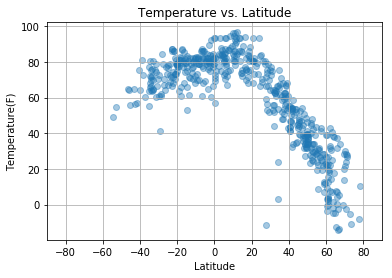

In [12]:
# Build a scatter plot that shows Temperature (F) vs. Latitude
plt.scatter(new_meta["Latitude"],
            new_meta["Temperature"],
            linewidths=1, marker="o",
            alpha=0.4, label="?")

# Label the graph and set axis limits
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90,90])

# Save the figure as png image (for each scatter plot) 
plt.savefig("temp_vs_latitude.png")

# Show plot
plt.show()

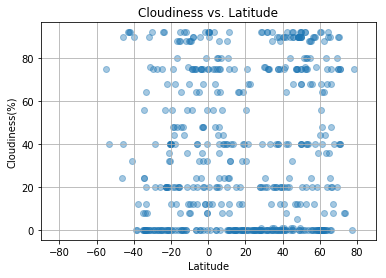

In [13]:
# Build a scatter plot that shows Temperature (F) vs. Latitude
plt.scatter(new_meta["Latitude"],
            new_meta["Cloudiness"],
            linewidths=1, marker="o",
            alpha=0.4, label="?")

# Label the graph and set axis limits
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90,90])

# Save the figure as png image 
plt.savefig("cloudiness_vs_latitude.png")

# Show plot
plt.show()

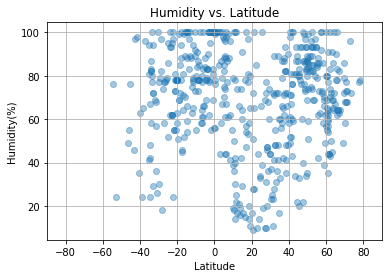

In [14]:
# Build a scatter plot that shows Humidity (%) vs. Latitude
plt.scatter(new_meta["Latitude"],
            new_meta["Humidity"],
            linewidths=1, marker="o",
            alpha=0.4, label="?")

# Label the graph and set axis limits
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90,90])

# Save the figure as png image 
plt.savefig("humidity_vs_latitude.png")

# Show plot
plt.show()

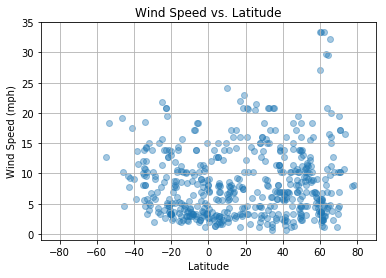

In [15]:
# Build a scatter plot that shows Wind Speed (F) vs. Latitude
plt.scatter(new_meta["Latitude"],
            new_meta["Wind Speed"],
            linewidths=1, marker="o",
            alpha=0.4, label="?")

# Label the graph and set axis limits
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90,90])

# Save the figure as png image 
plt.savefig("windspeed_vs_latitude.png")

# Show plot
plt.show()